In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("customer_shopping_data.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [26]:
print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


In [10]:
df = df[['customer_id', 'age', 'category', 'quantity', 'price']]
df.dropna(inplace=True)
df['total_spent'] = df['quantity'] * df['price']


In [22]:
customer_data = df.groupby('customer_id').agg({'age': 'mean','total_spent': 'sum','quantity': 'sum'}).reset_index()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['age', 'total_spent', 'quantity']])
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(scaled_data)

In [18]:
cluster_0 = customer_data[customer_data['cluster'] == 0]['total_spent']
cluster_1 = customer_data[customer_data['cluster'] == 1]['total_spent']
t_stat, p_value = ttest_ind(cluster_0, cluster_1, equal_var=False)

print(f"T-test Results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


T-test Results: t-statistic = 0.0979, p-value = 0.9220


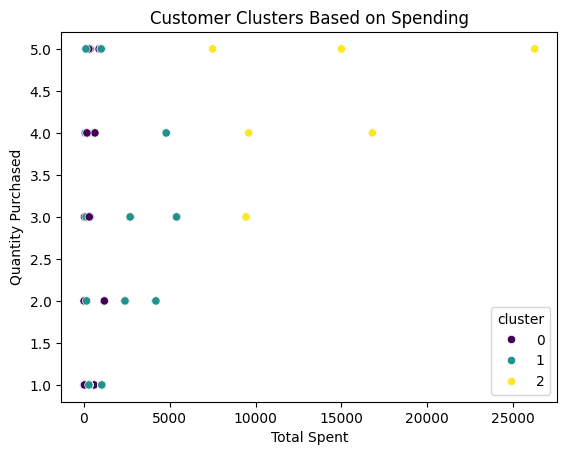

In [20]:
sns.scatterplot(data=customer_data, x='total_spent', y='quantity', hue='cluster', palette='viridis')
plt.title("Customer Clusters Based on Spending")
plt.xlabel("Total Spent")
plt.ylabel("Quantity Purchased")
plt.show()